# Data Visualization Part 3! Now it is time to deal with my BIG DATA dataset

### 1.58 million entries.  Not too shabby.

#### There is a bit of data wrangling here, but not too much.

In [1]:
# Import all the things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots inline
%matplotlib inline

In [3]:
# Read in the beast.
# This takes a second (or 6)
# In the future I'm going to try DataTable library for speed
df = pd.read_csv('./data/reviews.csv')
df.shape

(1584724, 10)

In [3]:
df.head()

,Unnamed: 0,brewery_name,beer_style,beer_name,avg_review,beer_abv,review_aroma,review_appearance,review_palate,review_taste
0,0,Vecchio Birraio,Hefeweizen,Sausa Weizen,1.875,5.0,2.0,2.5,1.5,1.5
1,1,Vecchio Birraio,English Strong Ale,Red Moon,2.875,6.2,2.5,3.0,3.0,3.0
2,2,Vecchio Birraio,Foreign / Export Stout,Black Horse Black Beer,2.875,6.5,2.5,3.0,3.0,3.0
3,3,Vecchio Birraio,German Pilsener,Sausa Pils,3.000,5.0,3.0,3.5,2.5,3.0
4,4,Caldera Brewing Company,American Double / Imperial IPA,Cauldron DIPA,4.250,7.7,4.5,4.0,4.0,4.5


In [4]:
# Drop unneeded columns
df.drop(columns=['Unnamed: 0', 'brewery_name', 'beer_name'], inplace=True)

In [5]:
# Create a new dataframe that is grouped by beer style
df2 = df.groupby('beer_style').mean()

In [6]:
# check my data type for sanity
type(df2)

pandas.core.frame.DataFrame

In [7]:
# RESET THE FRIGGIN INDEX!
df2.reset_index(inplace=True)

# Check our work
df2.head()

,beer_style,avg_review,beer_abv,review_aroma,review_appearance,review_palate,review_taste
0,Altbier,3.722823,5.909016,3.624015,3.809327,3.713086,3.744865
1,American Adjunct Lager,2.671835,4.987239,2.480211,2.788546,2.735471,2.683112
2,American Amber / Red Ale,3.697567,6.119741,3.627254,3.810190,3.656696,3.696127
3,American Amber / Red Lager,3.367294,5.115123,3.213296,3.527494,3.354795,3.373590
4,American Barleywine,4.023758,10.641583,4.019343,4.036535,3.996521,4.042633


In [8]:
# create yet another dataframe that does a count of beer styles in the data set to check for 'popularity'
style_df = pd.DataFrame(df.beer_style.value_counts())

# INDEX! RESET IT!
style_df.reset_index(inplace=True)

# Also rename that pesky 'index' column I know is there... and um... call a column 'count' ... ??
# No - actually NEVER call a column count .. or style ... 
# because THOSE ARE BUILT IN METHODS
# and calling count.count is ... awkward.
# I left my stupid error here for people to learn from.
style_df.rename(columns={'index':'style', 'beer_style':'count'}, inplace=True)

# Check your work
style_df

,style,count
0,American IPA,117586
1,American Double / Imperial IPA,85977
2,American Pale Ale (APA),63469
3,Russian Imperial Stout,54128
4,American Double / Imperial Stout,50705
5,American Porter,50476
6,American Amber / Red Ale,45751
7,Belgian Strong Dark Ale,37743
8,Fruit / Vegetable Beer,33820
9,American Strong Ale,31945


# Data wrangled!

## On to plotting

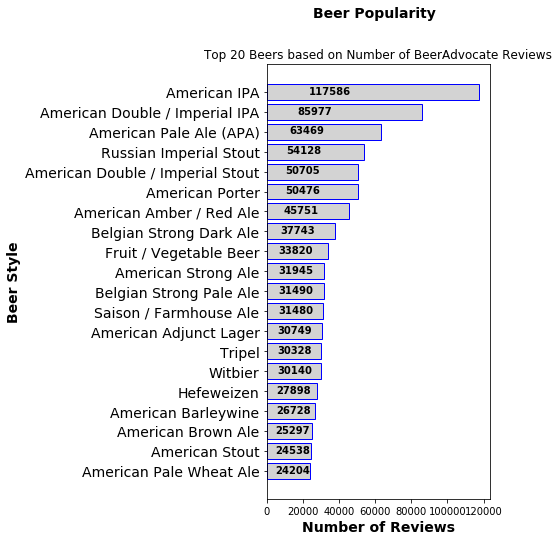

In [9]:
# Plot the plots
style_list = list(style_df['style'].head(20))
count_list = list(style_df['count'].head(20))

plt.barh(style_list, count_list, edgecolor='blue', color='lightgrey')

plt.suptitle('Beer Popularity', fontsize='14', fontweight='bold')
plt.title('Top 20 Beers based on Number of BeerAdvocate Reviews')
plt.xlabel('Number of Reviews', fontsize='14', fontweight='bold')
plt.ylabel('Beer Style', fontsize='14', fontweight='bold')
plt.yticks(fontsize='14')

for i, v in enumerate(count_list):
    plt.text(v/5, i+.1, str(v), color='black', fontweight='bold')

plt.gcf().set_size_inches(4,8)
plt.gca().invert_yaxis()

plt.savefig('./plots/style_popularity.png', transparent=True, bbox_inches='tight')
plt.show()

In [10]:
# sanity check that data please!
df2.head()

,beer_style,avg_review,beer_abv,review_aroma,review_appearance,review_palate,review_taste
0,Altbier,3.722823,5.909016,3.624015,3.809327,3.713086,3.744865
1,American Adjunct Lager,2.671835,4.987239,2.480211,2.788546,2.735471,2.683112
2,American Amber / Red Ale,3.697567,6.119741,3.627254,3.810190,3.656696,3.696127
3,American Amber / Red Lager,3.367294,5.115123,3.213296,3.527494,3.354795,3.373590
4,American Barleywine,4.023758,10.641583,4.019343,4.036535,3.996521,4.042633


In [11]:
# let's get some correlation data ... you know... cause correlation.
df2.corr()

,avg_review,beer_abv,review_aroma,review_appearance,review_palate,review_taste
avg_review,1.000000,0.553210,0.991116,0.976250,0.993186,0.996120
beer_abv,0.553210,1.000000,0.566114,0.510917,0.567052,0.540510
review_aroma,0.991116,0.566114,1.000000,0.953124,0.977485,0.986628
review_appearance,0.976250,0.510917,0.953124,1.000000,0.958436,0.959177
review_palate,0.993186,0.567052,0.977485,0.958436,1.000000,0.993609
review_taste,0.996120,0.540510,0.986628,0.959177,0.993609,1.000000


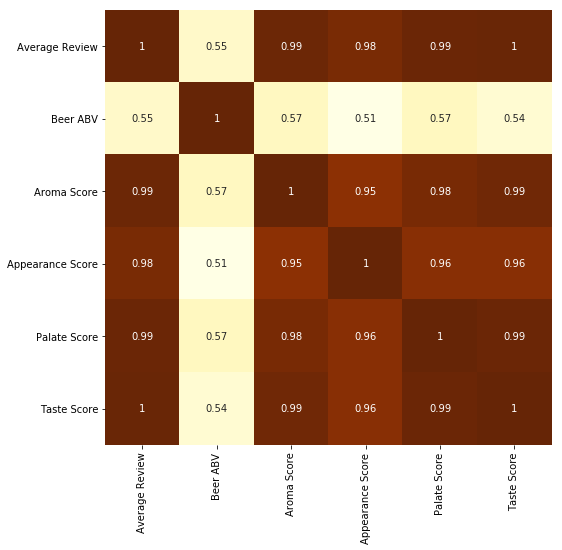

In [12]:
# Let's plot that correlation data using seaborn 
# (yeah, I am finally using seaborn after importing it in all the other notebooks and NOT using it)
sns.heatmap(df2.corr(), annot=True, cmap='YlOrBr', cbar=False, xticklabels=['Average Review', 'Beer ABV', 
                                                                            'Aroma Score', 'Appearance Score',
                                                                           'Palate Score', 'Taste Score'], yticklabels=['Average Review', 'Beer ABV', 
                                                                            'Aroma Score', 'Appearance Score',
                                                                           'Palate Score', 'Taste Score'])
plt.gcf().set_size_inches(8,8)
plt.show()

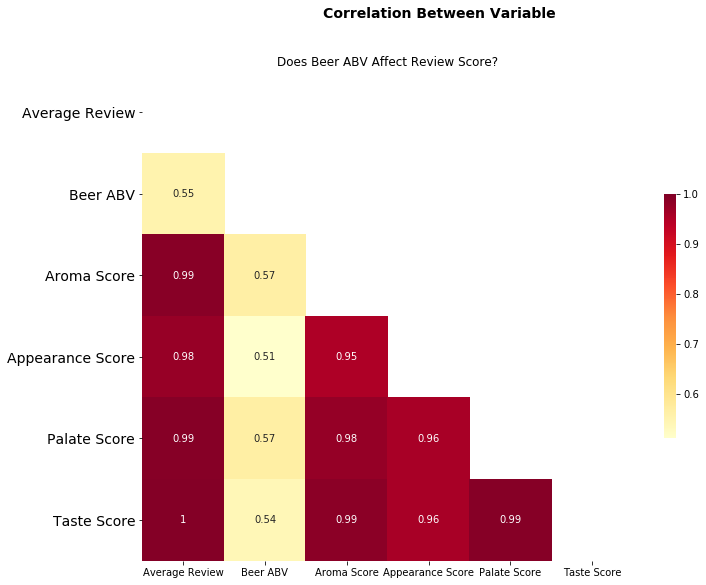

In [13]:
# Let's make a PRETTIER correlation heatmap
# Assign the correlation to a new dataframe
corr = df2.corr()

# create a mask to print only 1/2 of the heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='YlOrRd', annot=True, cbar_kws={"shrink": .5}, xticklabels=['Average Review', 'Beer ABV', 
                                                                            'Aroma Score', 'Appearance Score',
                                                                           'Palate Score', 'Taste Score'], yticklabels=['Average Review', 'Beer ABV', 
                                                                            'Aroma Score', 'Appearance Score',
                                                                           'Palate Score', 'Taste Score'])
plt.suptitle('Correlation Between Variable', fontweight='bold', fontsize='14')
plt.title('Does Beer ABV Affect Review Score?')
plt.yticks(fontsize='14')

plt.savefig('./plots/correlation.png', transparent=True, bbox_inches='tight')
plt.show()

In [14]:
# sort values and check data for top 20 beer styles
df2.sort_values('avg_review', inplace=True, ascending=False)

df2.head(20)

,beer_style,avg_review,beer_abv,review_aroma,review_appearance,review_palate,review_taste
11,American Double / Imperial Stout,4.152549,10.566154,4.160665,4.163633,4.098669,4.187230
86,Quadrupel (Quad),4.146598,10.434417,4.132533,4.117964,4.124986,4.210909
89,Russian Imperial Stout,4.130783,9.949377,4.076578,4.210067,4.086924,4.149562
41,Eisbock,4.111622,11.366699,4.156778,3.964514,4.113594,4.211603
63,Gueuze,4.081565,5.617432,4.117574,4.034864,4.046680,4.127143
20,American Wild Ale,4.080694,7.679297,4.126756,4.005451,4.040632,4.149938
9,American Double / Imperial IPA,4.072777,9.347396,4.097782,4.078916,4.023128,4.091280
100,Weizenbock,4.030506,8.117092,4.044677,4.009297,3.990703,4.077348
75,Lambic - Unblended,4.029960,5.417065,4.118043,3.912478,3.964991,4.124327
58,Flanders Red Ale,4.026842,6.102473,4.044043,4.001801,3.970888,4.090636


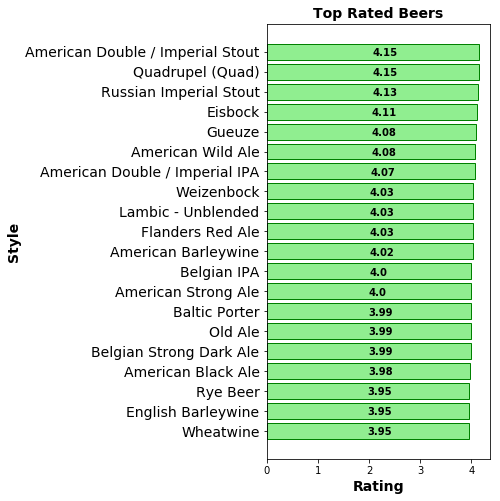

In [134]:
# Plot the plots
plt.barh(df2.beer_style.head(20), df2.avg_review.head(20), edgecolor='green', color='lightgreen')

plt.title('Top Rated Beers', fontsize='14', fontweight='bold')
plt.xlabel('Rating', fontsize='14', fontweight='bold')
plt.ylabel('Style', fontsize='14', fontweight='bold')
plt.yticks(fontsize='14')

for i, v in enumerate(df2.avg_review.head(20)):
    plt.text(v/2, i+.2, str(round(v,2)), color='black', fontweight='bold')

plt.gca().invert_yaxis()
plt.gcf().set_size_inches(4,8)

plt.savefig('./plots/top_beers.png', transparent=True, bbox_inches='tight')
plt.show()

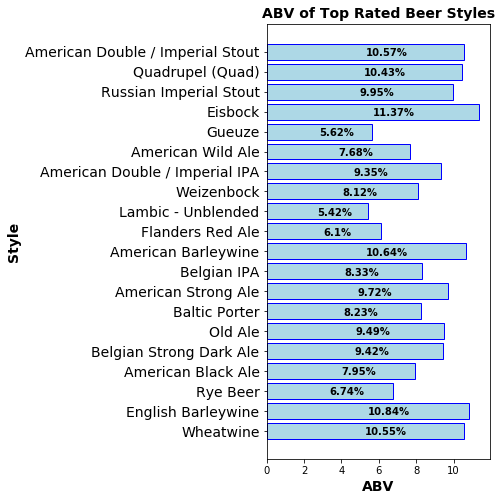

In [15]:
# Remember what I said about a function... yeah... functions are goood, carpal tunnel is bad
# ...
# where's my advil?
plt.barh(df2.beer_style.head(20), df2.beer_abv.head(20), edgecolor='blue', color='lightblue')

plt.title('ABV of Top Rated Beer Styles', fontsize='14', fontweight='bold')
plt.xlabel('ABV', fontsize='14', fontweight='bold')
plt.ylabel('Style', fontsize='14', fontweight='bold')
plt.yticks(fontsize='14')

for i, v in enumerate(df2.beer_abv.head(20)):
    plt.text(v/2, i+.2, str(round(v,2))+'%', color='black', fontweight='bold')

plt.gca().invert_yaxis()
plt.gcf().set_size_inches(4,8)

plt.savefig('./plots/top_beers_abv.png', transparent=True, bbox_inches='tight')
plt.show()

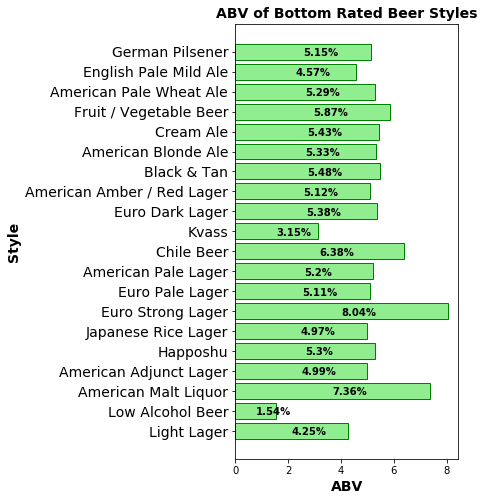

In [16]:
# More plots
plt.barh(df2.beer_style.tail(20), df2.beer_abv.tail(20), edgecolor='green', color='lightgreen')

plt.title('ABV of Bottom Rated Beer Styles', fontsize='14', fontweight='bold')
plt.xlabel('ABV', fontsize='14', fontweight='bold')
plt.ylabel('Style', fontsize='14', fontweight='bold')
plt.yticks(fontsize='14')

for i, v in enumerate(df2.beer_abv.tail(20)):
    plt.text(v/2, i+.2, str(round(v,2))+'%', color='black', fontweight='bold')

plt.gca().invert_yaxis()
plt.gcf().set_size_inches(4,8)

plt.savefig('./plots/bottom_beers_abv.png', transparent=True, bbox_inches='tight')
plt.show()

In [17]:
# silly sanity check just to make SUPER sure the data isn't weird (late in the game for this step eh?)
df2.beer_style.value_counts()

Belgian Strong Dark Ale               1
Rauchbier                             1
Maibock / Helles Bock                 1
American Amber / Red Ale              1
Oatmeal Stout                         1
American Black Ale                    1
American Strong Ale                   1
Milk / Sweet Stout                    1
Euro Dark Lager                       1
Bock                                  1
American Barleywine                   1
Winter Warmer                         1
Chile Beer                            1
Smoked Beer                           1
California Common / Steam Beer        1
Hefeweizen                            1
American Wild Ale                     1
Scottish Ale                          1
Munich Dunkel Lager                   1
Pumpkin Ale                           1
American Brown Ale                    1
Kristalweizen                         1
Faro                                  1
American Blonde Ale                   1
American Double / Imperial Pilsner    1


In [18]:
# Pull some stats on the data set for Key Performance Indicators
df.describe()

,avg_review,beer_abv,review_aroma,review_appearance,review_palate,review_taste
count,1.584724e+06,1.584724e+06,1.584724e+06,1.584724e+06,1.584724e+06,1.584724e+06
mean,3.779017e+00,7.043661e+00,3.736260e+00,3.842132e+00,3.744215e+00,3.793462e+00
std,5.792405e-01,2.272995e+00,6.974088e-01,6.159270e-01,6.820872e-01,7.317871e-01
min,1.000000e+00,1.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.500000e+00,5.300000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00
50%,3.875000e+00,6.600000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,4.125000e+00,8.400000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00
max,5.000000e+00,5.770000e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


# Here ends Data Visualization part 3. Stay tuned for MAPPING! Goto folium_viz notebook. It is quick. I promise.